**Report and Code for Home Work 2**

---



*   First will be presented Nearest-Neighbor Interpolation with images example above the text and in a zip file.
*   Second Histogram Equalization will be explained with the result attached to the notebook.
*   Then implementation of Floyd–Steinberg dithering will be explained, examples will be shown in the notebook and attached to the zip file.

> h stands for height,  w - width,  c - channels


In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def open_image(name):
  imname = os.path.join(os.getcwd(), name)
  img = Image.open(imname)
  img = np.array(img)
  return img

In [3]:
def interpolate_nn(image, scale):
  h, w, c = image.shape
  new_h, new_w = h * scale, w * scale
  new_image = np.zeros((new_h, new_w, c), np.uint8)
  for i in range(new_h):
    for j in range(new_w):
      old_i, old_j = int(np.around(i / scale)), int(np.around(j / scale))
      if old_i == h:
        old_i = old_i - 1
      if old_j == w:
        old_j = old_j - 1
      new_image[i, j] = image[old_i, old_j]
  return new_image

def robt310_project2_interpolation(input_file_name, output_file_name, scale_factor):
  img = open_image(input_file_name)
  out_img = interpolate_nn(img, scale_factor)
  im = Image.fromarray(out_img)
  im.save(output_file_name)
  return img, out_img

(514, 846, 4) (1028, 1692, 4)


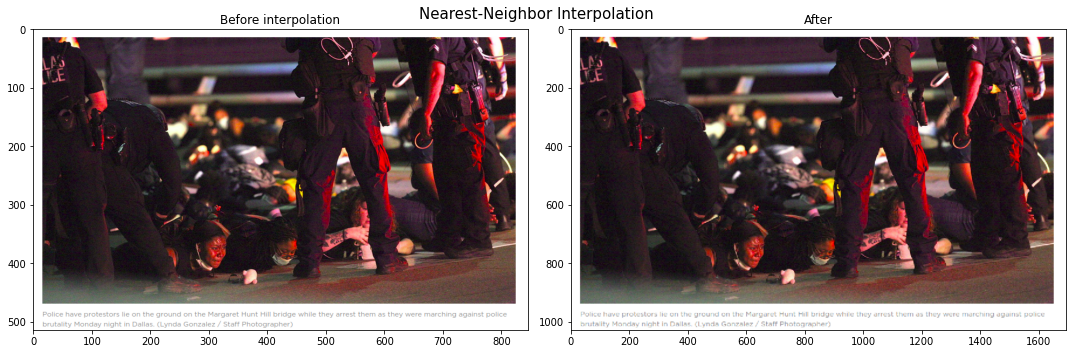

In [4]:
name = "dallas.png"
output = "new_dallas.png"

in_image, out_image = robt310_project2_interpolation(name, output, 2)
print(in_image.shape, out_image.shape)

rows = 1
columns = 2
fplot, axis = plt.subplots(rows, columns, figsize=(15,5))

axis[0].imshow(in_image)
axis[1].imshow(out_image)

axis[0].set_title('Before interpolation')
axis[1].set_title('After')

title = 'Nearest-Neighbor Interpolation'
fplot.suptitle(title, fontsize=15)
plt.tight_layout()
plt.show()

**Nearest-Neighbor Interpolation** 

---


*   open_image function just takes the file name, opens it, and converts it to NumPy array.
*   interpolate_nn function takes NumPy array and scale, here in the example is two. It is the main function and implementation of the algorithm. What it does, it creates a new empty NumPy array with the scaled sizes of the original image. Then it goes throw each pixels' position. We then get a new interpolated position by getting rounded old pixel position by inverse mapping (dividing by scale). So for example if it is an integer, then it remains, if it is float, we find the closest pixel value by rounding it. We can see now what behind its name: nearest-neighbor.
*   robt310_project2_interpolation is functioning as it was asked in the task. We provide the name of the file, output name, and scale. In this example, we can see that image was upscaled by 2 using nearest-neighbor interpolation. The quality is still good even if the method is pretty trivial. Even text is pretty readable. I also do not know why this image is on my computer.


In [5]:
def get_historgram(flattened_image, max_intensity = 256):
  hist = np.zeros(max_intensity)
  for value in flattened_image:
    hist[int(value)] +=1
  return hist

def histogram_equalization(img):
  flattened_image = img.flatten()
  histogram = get_historgram(flattened_image)

  cumilative_sum = np.zeros(histogram.shape)

  for index, value in enumerate(histogram):
    if index == 0:
      cumilative_sum[0] = histogram[0]
    cumilative_sum[index] = cumilative_sum[index-1] + value

  cumilative_sum = cumilative_sum.astype("uint8")

  #maxmin standartization
  cumilative_sum = (cumilative_sum - cumilative_sum.min())/(cumilative_sum.max() - cumilative_sum.min()) * 255
  cumilative_sum = cumilative_sum.astype("uint8")

  image_after = cumilative_sum[flattened_image].reshape(img.shape)
  return image_after 

def robt310_project2_histogram_equalize(input_file_name):
  img = open_image(input_file_name)
  img_after = histogram_equalization(img)
  
  h, w = img.shape
  image_after_local = img.copy()
  window = 40
  for h_i in range(0, h, window):
    for w_j in range(0, w, window):
        windowed_part = image_after_local[h_i : h_i + window, w_j : w_j + window]
        windowed_part[:,:] = histogram_equalization(windowed_part)
  return img, img_after, image_after_local

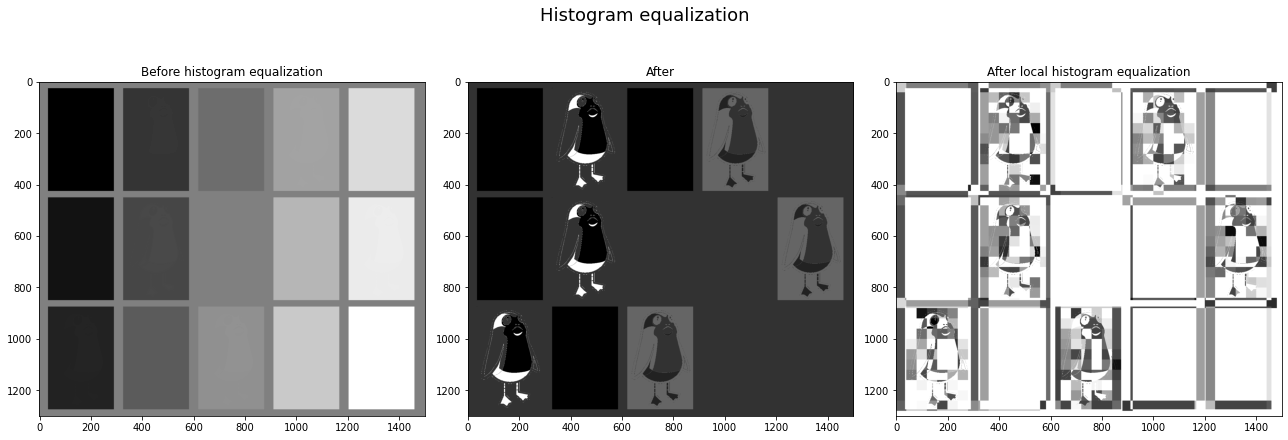

In [6]:
input_file_name = "secret.png"
img, img_after, image_after_local = robt310_project2_histogram_equalize(input_file_name)

rows = 1
columns = 3
fplot, axis = plt.subplots(rows, columns, figsize=(18,7))

axis[0].imshow(img, cmap='gray')
axis[1].imshow(img_after, cmap='gray')
axis[2].imshow(image_after_local, cmap='gray')

axis[0].set_title('Before histogram equalization')
axis[1].set_title('After')
axis[2].set_title('After local histogram equalization')

title = 'Histogram equalization'
fplot.suptitle(title, fontsize=18)
plt.tight_layout()
plt.show()

**Histogram equalization**

---


1.   Apply histogram equalization and describe what you see: Some of the solid rectangles were monotonic and after equalization, they changed to a darker tone but still were monotonic. However, some of the rectangles had a hidden representation of penguins. After histogram equalization, the contrast was adjusted and improved, that is why it became easier and apparent to spot penguins.
2.   After local his. eq., describe what you see and why the results are different: The result is different because every "window" of the original image has its histogram and colors. After contrast adjustment, every window shows its color palette, however, it is possible to see penguins and monotonic rectangles.


In [7]:
def find_closest_palette_color(pixel):
  # 0 or 255
  return 255 * np.floor(pixel/128)


def dithering(input_image):
  #coping and renaming with regards to algorithm
  pixel = input_image.copy()
  h, w = pixel.shape
  for x in range(h):
    for y in range(w):
      oldpixel = pixel[x, y]
      newpixel = find_closest_palette_color(oldpixel)
      pixel[x, y] = newpixel
      quant_error = oldpixel - newpixel
      if x < h - 1:
        pixel[x + 1][y    ] = pixel[x + 1][y    ] + round(quant_error * 7 / 16)
      if x > 1 and y < w - 1:       
        pixel[x - 1][y + 1] = pixel[x - 1][y + 1] + round(quant_error * 3 / 16)
      if y < w - 1:       
        pixel[x    ][y + 1] = pixel[x    ][y + 1] + round(quant_error * 5 / 16)
      if x < h - 1 and y < w - 1:
        pixel[x + 1][y + 1] = pixel[x + 1][y + 1] + round(quant_error * 1 / 16)
  return pixel


def robt310_project2_dither(input_file_name, output_file_name, part = 0):
  #no other parts
  img = open_image(input_file_name)
  img_after_dithering = dithering(img)
  im = Image.fromarray(img_after_dithering)
  im.save(output_file_name)
  return img, img_after_dithering

(1204, 1880) (1204, 1880)


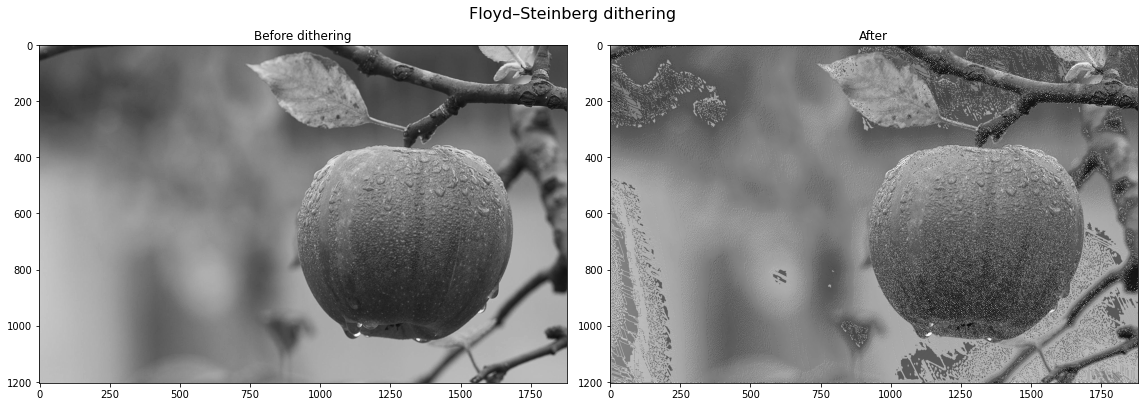

In [8]:
input_file_name = "grey2.jpeg"
output_file_name = "grey.jpeg"

in_image, img_after_dithering = robt310_project2_dither(input_file_name, output_file_name)

print(in_image.shape, img_after_dithering.shape)

rows = 1
columns = 2
fplot, axis = plt.subplots(rows, columns, figsize=(16,6))

axis[0].imshow(in_image, cmap='gray')
axis[1].imshow(img_after_dithering, cmap='gray')

axis[0].set_title('Before dithering')
axis[1].set_title('After')

title = 'Floyd–Steinberg dithering'
fplot.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

**Floyd–Steinberg dithering**

---

*   Here as tasks ask, robt310_project2_dither was implemented. It has an input file name, output name. 
*   The algorithm itself presented in function dithering, I tried to follow pseudo-code as close as possible. Here find_closest_palette_color was implemented as 255 * np.floor(pixel/128). It will return either 0 or 255 because the floor of pixel division will be always either 0 or 1. 
*  Also difference was if statements, they were just checking if we and the border of the image or now. Because if we are, then the next +1 position will not exist. So it is just implemented to not broke the image going out of bounds.
* The resulting image can be seen above to the right. While the quality seems nice, there is still some kind of noise. I believe the reason is the original image was pretty complex with good shadow work and it made noise after dithering.